In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
fact_table = pd.read_excel("case-study-data.xlsx", sheet_name = "Fact_table",engine='openpyxl')
trans_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Trans_dim",engine='openpyxl')
item_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Item_dim",engine='openpyxl')
customer_dim = pd.read_excel("case-study-data.xlsx", sheet_name ="Customer_dim", engine='openpyxl')
time_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Time_dim",engine='openpyxl')
store_dim = pd.read_excel("case-study-data.xlsx", sheet_name = "Store_dim",engine='openpyxl')
print("data has been loaded successfully!!")

data has been loaded successfully!!


In [3]:
fact_trans = pd.merge(fact_table, trans_dim,on= 'payment_key')
fact_trans_item = pd.merge(fact_trans, item_dim, on='item_key')
fact_trans_item_cust = pd.merge(fact_trans_item, customer_dim, on='customer_key')
fact_trans_item_cust_time = pd.merge(fact_trans_item_cust, time_dim, on='time_key')
fact_trans_item_cust_time_store = pd.merge(fact_trans_item_cust_time,store_dim, on= 'store_key')


In [4]:
fact_trans_item_cust_time_store.head(5)

,payment_key,customer_key,time_key,item_key,store_key,quantity_sold,unit_x,unit_price_x,total_price,trans_type,...,week,month,quarter,year,store_size,location,city,upazila_y,district_y,division_y
0,P025,C005440,T01562,I00264,S0035,1,Ct,15.0,15.0,card,...,2nd Week,7,Q3,2016,large,"Boira, Dhaka road",Khulna,Boira,Khulna,Khulna
1,P002,C002862,T02119,I00264,S0008,7,Ct,15.0,105.0,card,...,3rd Week,2,Q1,2016,medium,9 A road,Sunamganj,Jamalganj,Sunamganj,Sylhet
2,P001,C000360,T04322,I00091,S0024,4,bottles,7.5,30.0,cash,...,2nd Week,1,Q1,2020,large,"H-607,R-10 Baitul Aman Housing Society, Rajshahi",Rajshahi,Rajshahi,Rajshahi,Rajshahi
3,P013,C001636,T02225,I00174,S0037,11,oz,18.0,198.0,card,...,3rd Week,6,Q2,2019,small,Hill town,Rangamati,Baghaichari,Rangamati,Chittagong
4,P039,C000641,T04425,I00241,S0009,6,ct,12.0,72.0,mobile,...,1st Week,1,Q1,2019,small,Infront of Mohonpur jame mosjid,Sunamganj,Tahirpur,Sunamganj,Sylhet


In [5]:
fact_trans_item_cust_time_store.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity_sold', 'unit_x', 'unit_price_x', 'total_price', 'trans_type',
       'bank_name', 'item_name', 'item_type', 'unit_price_y', 'man_country',
       'supplier', 'stock_quantity', 'unit_y', 'name', 'contact_no', 'nid',
       'address', 'street', 'upazila_x', 'district_x', 'division_x', 'date',
       'hour', 'day', 'week', 'month', 'quarter', 'year', 'store_size',
       'location', 'city', 'upazila_y', 'district_y', 'division_y'],
      dtype='object')

In [6]:
df = fact_trans_item_cust_time_store

In [7]:
df.isna().sum()

payment_key          0
customer_key         0
time_key             0
item_key             0
store_key            0
quantity_sold        0
unit_x             199
unit_price_x         0
total_price          0
trans_type           0
bank_name         7256
item_name            0
item_type            0
unit_price_y         0
man_country          0
supplier             0
stock_quantity       0
unit_y             199
name               318
contact_no           0
nid                  0
address              0
street            3716
upazila_x            0
district_x           0
division_x           0
date                 0
hour                 0
day                  0
week                 0
month                0
quarter              0
year                 0
store_size           0
location             0
city                 0
upazila_y            0
district_y           0
division_y           0
dtype: int64

In [8]:
mode_street= df['street'].mode()[0]
df['street'].fillna(mode_street, inplace=True)

In [9]:
mode_name= df['name'].mode()[0]
df['name'].fillna(mode_name, inplace=True)

In [10]:
mode_bank= df['bank_name'].mode()[0]
df['bank_name'].fillna(mode_bank, inplace=True)

In [11]:
mode_bank= df['unit_x'].mode()[0]
df['unit_x'].fillna(mode_bank, inplace=True)

In [12]:
df.isna().sum()

payment_key         0
customer_key        0
time_key            0
item_key            0
store_key           0
quantity_sold       0
unit_x              0
unit_price_x        0
total_price         0
trans_type          0
bank_name           0
item_name           0
item_type           0
unit_price_y        0
man_country         0
supplier            0
stock_quantity      0
unit_y            199
name                0
contact_no          0
nid                 0
address             0
street              0
upazila_x           0
district_x          0
division_x          0
date                0
hour                0
day                 0
week                0
month               0
quarter             0
year                0
store_size          0
location            0
city                0
upazila_y           0
district_y          0
division_y          0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_sold,100000.0,5.994920e+00,3.162659e+00,1.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.100000e+01
unit_price_x,100000.0,1.695979e+01,7.491110e+00,6.000000e+00,1.400000e+01,1.500000e+01,1.800000e+01,5.500000e+01
total_price,100000.0,1.016510e+02,7.381482e+01,6.000000e+00,4.800000e+01,9.000000e+01,1.400000e+02,6.050000e+02
unit_price_y,100000.0,1.695979e+01,7.491110e+00,6.000000e+00,1.400000e+01,1.500000e+01,1.800000e+01,5.500000e+01
stock_quantity,100000.0,2.541493e+02,7.842999e+02,3.000000e+00,2.400000e+01,4.000000e+01,1.350000e+02,5.000000e+03
contact_no,100000.0,8.801754e+12,1.438907e+08,8.801510e+12,8.801631e+12,8.801757e+12,8.801875e+12,8.802000e+12
nid,100000.0,5.559657e+12,2.614849e+12,1.000369e+12,3.294697e+12,5.620386e+12,7.831187e+12,9.998966e+12
hour,100000.0,1.153233e+01,6.917680e+00,0.000000e+00,6.000000e+00,1.200000e+01,1.700000e+01,2.300000e+01
day,100000.0,1.564651e+01,8.794971e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
month,100000.0,6.541460e+00,3.442406e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01


### Customer Lifetime Value (CLV) Analysis

     customer_key  total_spend  purchase_frequency  avg_order_value      clv
3036      C003037       3426.5                  21       131.788462  71956.5
2513      C002514       2886.0                  19       131.181818  54834.0
1969      C001970       2351.0                  22        97.958333  51722.0
85        C000086       2462.0                  21        94.692308  51702.0
3413      C003414       2976.5                  17       141.738095  50600.5
5825      C005827       2354.0                  21       107.000000  49434.0
863       C000864       2446.0                  20        97.840000  48920.0
6756      C006758       2835.0                  17       123.260870  48195.0
3976      C003977       2754.5                  17       125.204545  46826.5
1591      C001592       2405.0                  19       114.523810  45695.0


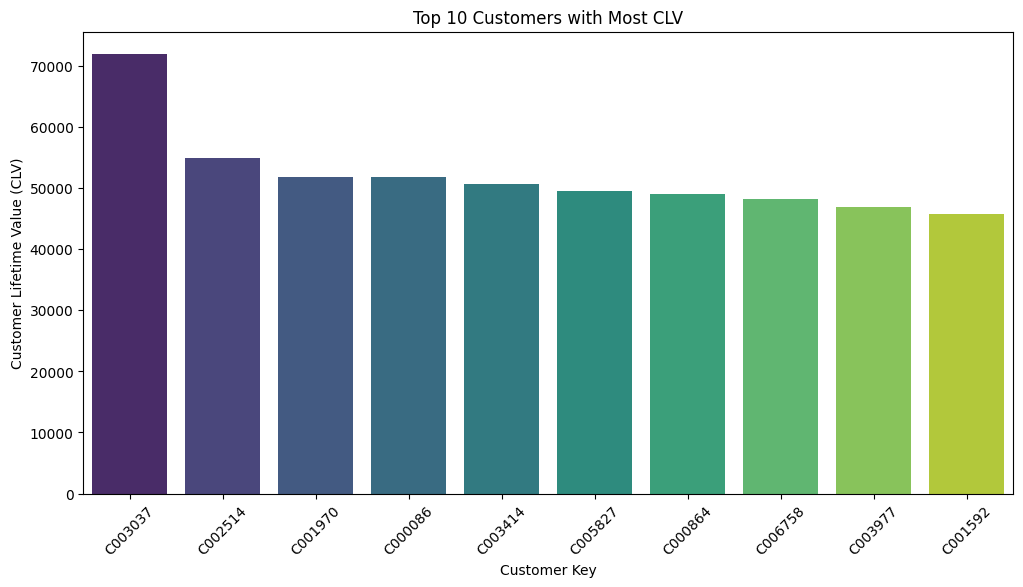

In [14]:
clv_data = df.groupby('customer_key').agg(
total_spend=('total_price', 'sum'),
purchase_frequency=('payment_key', 'nunique'),
avg_order_value=('total_price', 'mean'),
).reset_index()
clv_data['clv'] = clv_data['total_spend'] * clv_data['purchase_frequency']
clv_data = clv_data.sort_values(by='clv', ascending=False)
print(clv_data.head(10))
top_10_clv = clv_data.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_key', y='clv', data=top_10_clv, palette='viridis')
plt.title('Top 10 Customers with Most CLV')
plt.xlabel('Customer Key')
plt.ylabel('Customer Lifetime Value (CLV)')
plt.xticks(rotation=45)
plt.show()

### Transaction Method Analysis

                    bank_name  total_price
5                       Bkash   1282091.75
34      Standard Bank Limited    448616.75
1           BRAC Bank Limited    405400.00
10  Dutch-Bangla Bank Limited    388606.75
18  Mutual Trust Bank Limited    356585.50
29        Pubali Bank Limited    320792.00
3           Bank Asia Limited    319109.00
12          IFIC Bank Limited    311641.00
25           One Bank Limited    306304.50
11       Eastern Bank Limited    300755.50


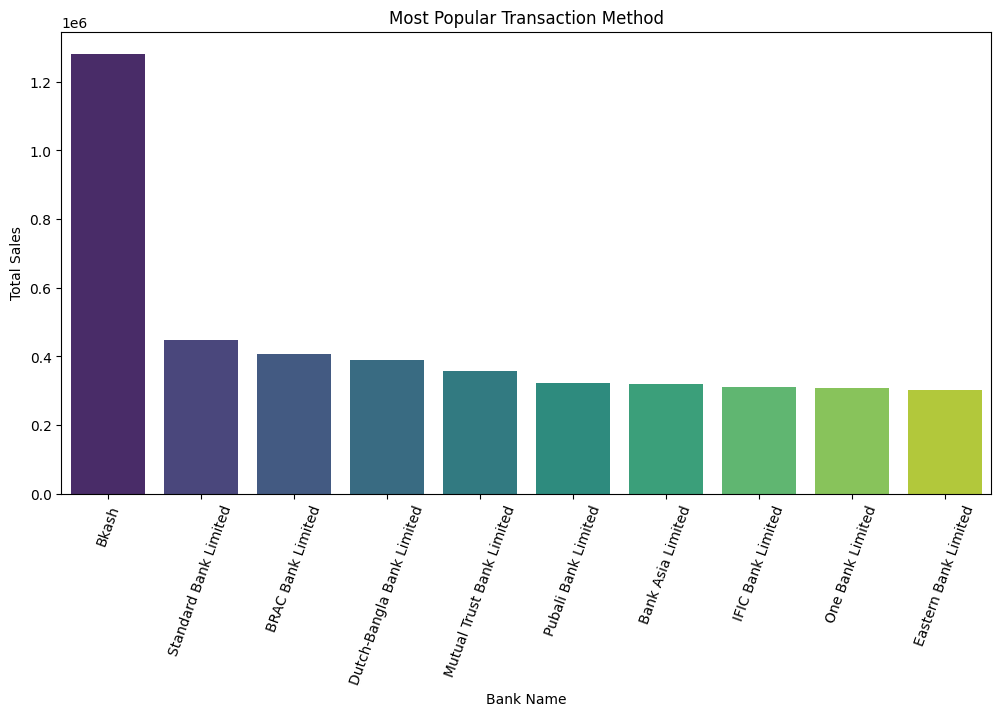

In [15]:
sales_by_bank = df.groupby('bank_name')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False).head(10)
print(sales_by_bank)
plt.figure(figsize=(12, 6))
sns.barplot(x='bank_name', y='total_price', data=sales_by_bank,palette='viridis')
plt.title('Most Popular Transaction Method')
plt.xlabel('Bank Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.show()

In [16]:
df.columns

Index(['payment_key', 'customer_key', 'time_key', 'item_key', 'store_key',
       'quantity_sold', 'unit_x', 'unit_price_x', 'total_price', 'trans_type',
       'bank_name', 'item_name', 'item_type', 'unit_price_y', 'man_country',
       'supplier', 'stock_quantity', 'unit_y', 'name', 'contact_no', 'nid',
       'address', 'street', 'upazila_x', 'district_x', 'division_x', 'date',
       'hour', 'day', 'week', 'month', 'quarter', 'year', 'store_size',
       'location', 'city', 'upazila_y', 'district_y', 'division_y'],
      dtype='object')

### Machine Learning Model

In [17]:
# Aggregating data
aggregated_data = df.groupby(['store_size', 'division_x']).agg(
    total_revenue=('total_price', 'sum'),
    total_quantity_sold=('quantity_sold', 'sum')
).reset_index()

print(aggregated_data)

   store_size  division_x  total_revenue  total_quantity_sold
0       large    Barishal      131662.75                 7660
1       large  Chittagong      444410.50                25758
2       large       Dhaka     3026425.00               179069
3       large      Sylhet      147384.00                 8724
4      medium    Barishal      122982.75                 7230
5      medium  Chittagong      367908.75                21995
6      medium       Dhaka     2586922.50               152328
7      medium      Sylhet      118156.00                 7219
8       small    Barishal      115876.25                 6791
9       small  Chittagong      377381.25                22444
10      small       Dhaka     2612172.50               153614
11      small      Sylhet      113819.00                 6660


In [18]:
# Preparing the data
X = aggregated_data[['store_size', 'division_x', 'total_quantity_sold']]
y = aggregated_data['total_revenue']

# Encoding categorical variables
label_cols = ['store_size', 'division_x']
lb_encoders = {}
for col in label_cols:
    lb_encoders[col] = LabelEncoder()
    X[col] = lb_encoders[col].fit_transform(X[col])

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2 * 100}')

Mean Absolute Error: 4801.898033909946
Mean Squared Error: 41913268.06558222
R^2 Score: 99.99663425286897


### New store opening prediction with targeted revenue

In [19]:
# Defining the target revenue
target_revenue = 2200

# Creating a grid of possible values for store_size and division
store_sizes = lb_encoders['store_size'].classes_
divisions = lb_encoders['division_x'].classes_
best_combination = None
best_revenue_diff = float('inf')

for store_size in store_sizes:
    for division in divisions:
        # Create a DataFrame with the desired features
        desired_features = pd.DataFrame({
            'store_size': [lb_encoders['store_size'].transform([store_size])[0]],
            'division_x': [lb_encoders['division_x'].transform([division])[0]],
            'total_quantity_sold': [10]
        })

        for _ in range(100):
            predicted_revenue = model.predict(desired_features)
            revenue_diff = abs(target_revenue - predicted_revenue[0])

            if revenue_diff < 1:
                break

            # Gradual adjustment
            total_quantity_sold = desired_features['total_quantity_sold'].values[0] * (target_revenue / predicted_revenue[0])
            desired_features['total_quantity_sold'] = total_quantity_sold

            final_predicted_revenue = model.predict(desired_features)
            revenue_diff = abs(target_revenue - final_predicted_revenue[0])

            if revenue_diff < best_revenue_diff:
                best_revenue_diff = revenue_diff
                best_combination = {
                    'store_size': store_size,
                    'division': division,
                    'total_quantity_sold': desired_features['total_quantity_sold'].values[0],
                    'predicted_revenue': final_predicted_revenue[0]
                }

# Print the best combination to achieve the target revenue
print(f'Best Combination to Achieve Target Revenue of {target_revenue}:')
print(f'Store Size: {best_combination["store_size"]}')
print(f'Division: {best_combination["division"]}')
print(f'Total Quantity Sold: {best_combination["total_quantity_sold"]}')
print(f'Predicted Revenue: {best_combination["predicted_revenue"]}')

Best Combination to Achieve Target Revenue of 2200:
Store Size: small
Division: Dhaka
Total Quantity Sold: 134.5955390346755
Predicted Revenue: 2199.9514965369244


In [20]:
df['date']

0        11-07-2016 13:18
1        19-02-2016 05:10
2        13-01-2020 17:25
3        15-06-2019 00:58
4        01-01-2019 07:30
               ...       
99995    15-07-2019 06:46
99996    24-10-2017 00:50
99997    27-10-2019 01:57
99998    20-01-2020 18:00
99999    15-10-2016 21:34
Name: date, Length: 100000, dtype: object

In [21]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['date'] = df['date'].dt.date
df['date']

0        2016-07-11
1        2016-02-19
2        2020-01-13
3        2019-06-15
4        2019-01-01
            ...    
99995    2019-07-15
99996    2017-10-24
99997    2019-10-27
99998    2020-01-20
99999    2016-10-15
Name: date, Length: 100000, dtype: object

In [22]:
time_series_data = df.groupby('date')['quantity_sold'].sum().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])
time_series_data

,date,quantity_sold
0,2014-01-20,76
1,2014-01-24,189
2,2014-01-25,172
3,2014-01-27,214
4,2014-01-28,614
...,...,...
2176,2021-01-18,289
2177,2021-01-19,321
2178,2021-01-20,223
2179,2021-01-21,259


### Demand Forcasting for next 12 months

d:\OneDrive\Desktop\code folder\python main\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


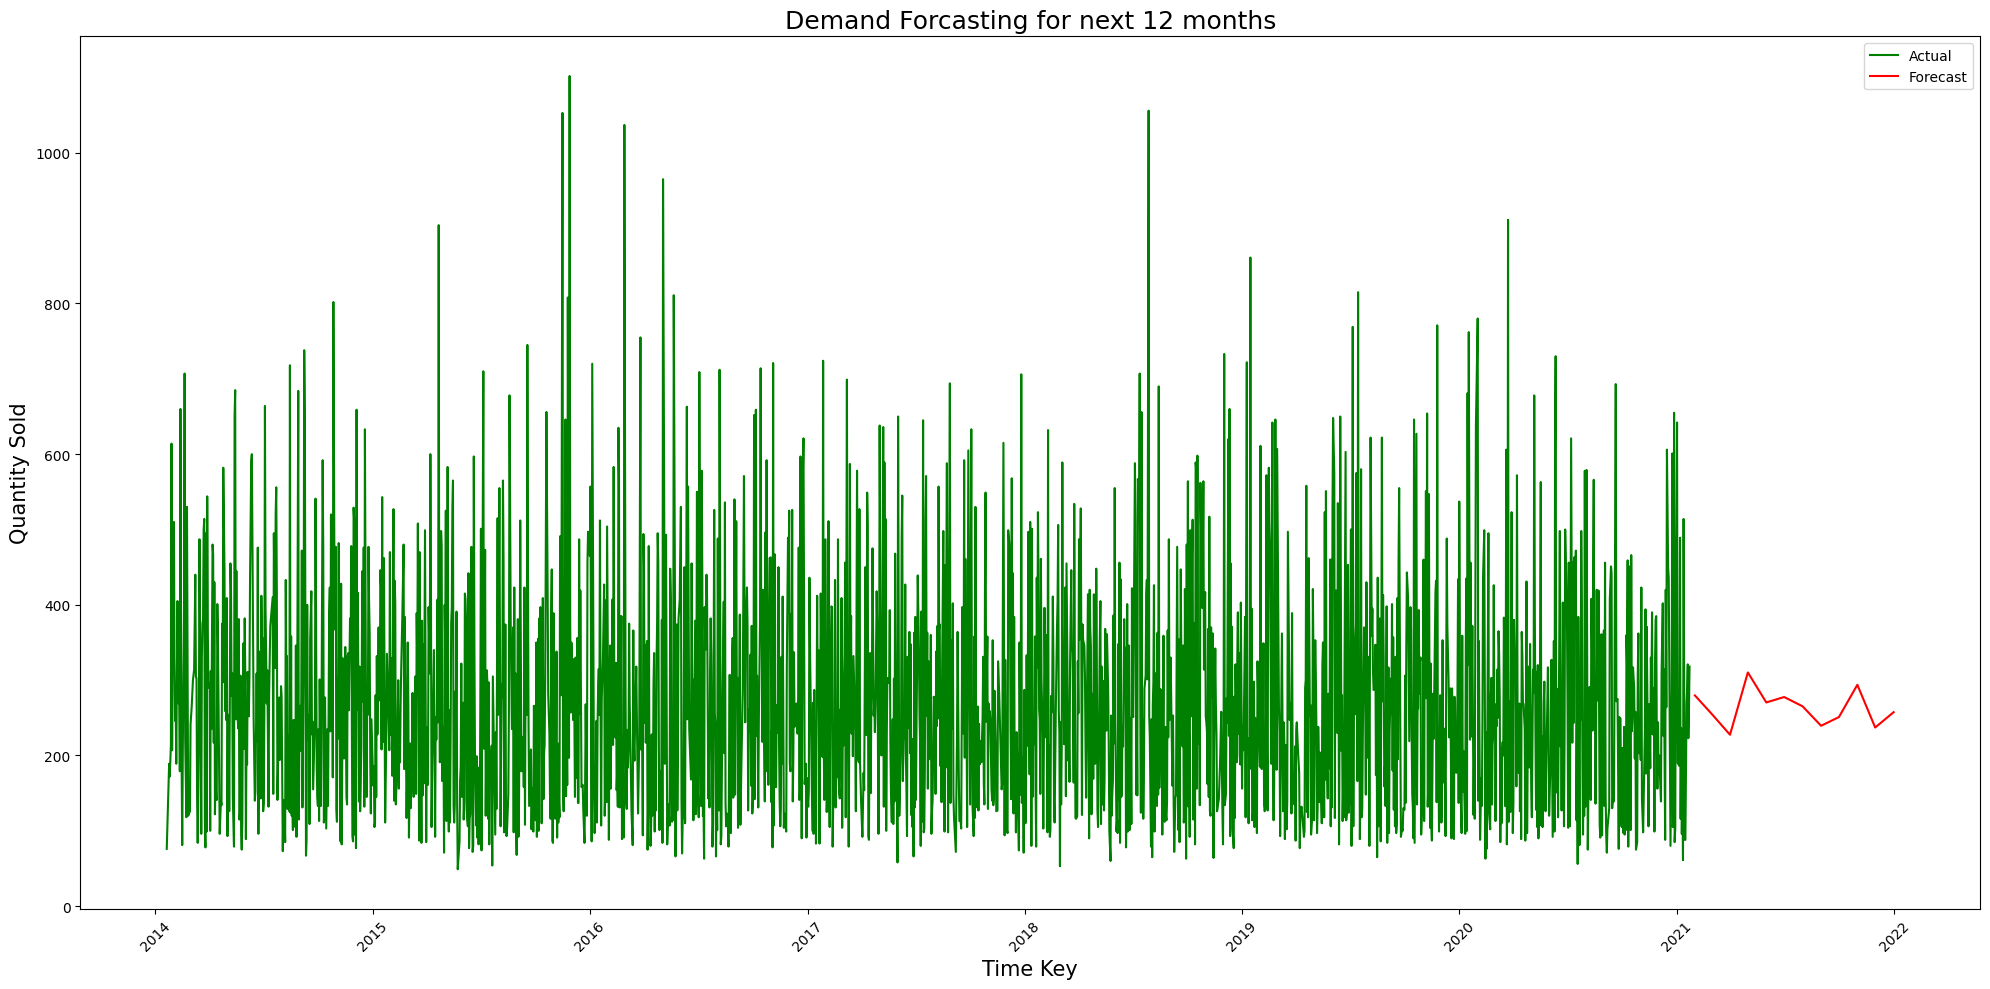

In [23]:
time_series_data = df.groupby('date')['quantity_sold'].sum().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])
model = ExponentialSmoothing(time_series_data['quantity_sold'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_data['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_data['date'], time_series_data['quantity_sold'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Demand Forcasting for next 12 months', fontsize=18)
plt.xlabel('Time Key', fontsize=15)
plt.ylabel('Quantity Sold', fontsize=15)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Revenue Forcasting for next 12 months

d:\OneDrive\Desktop\code folder\python main\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


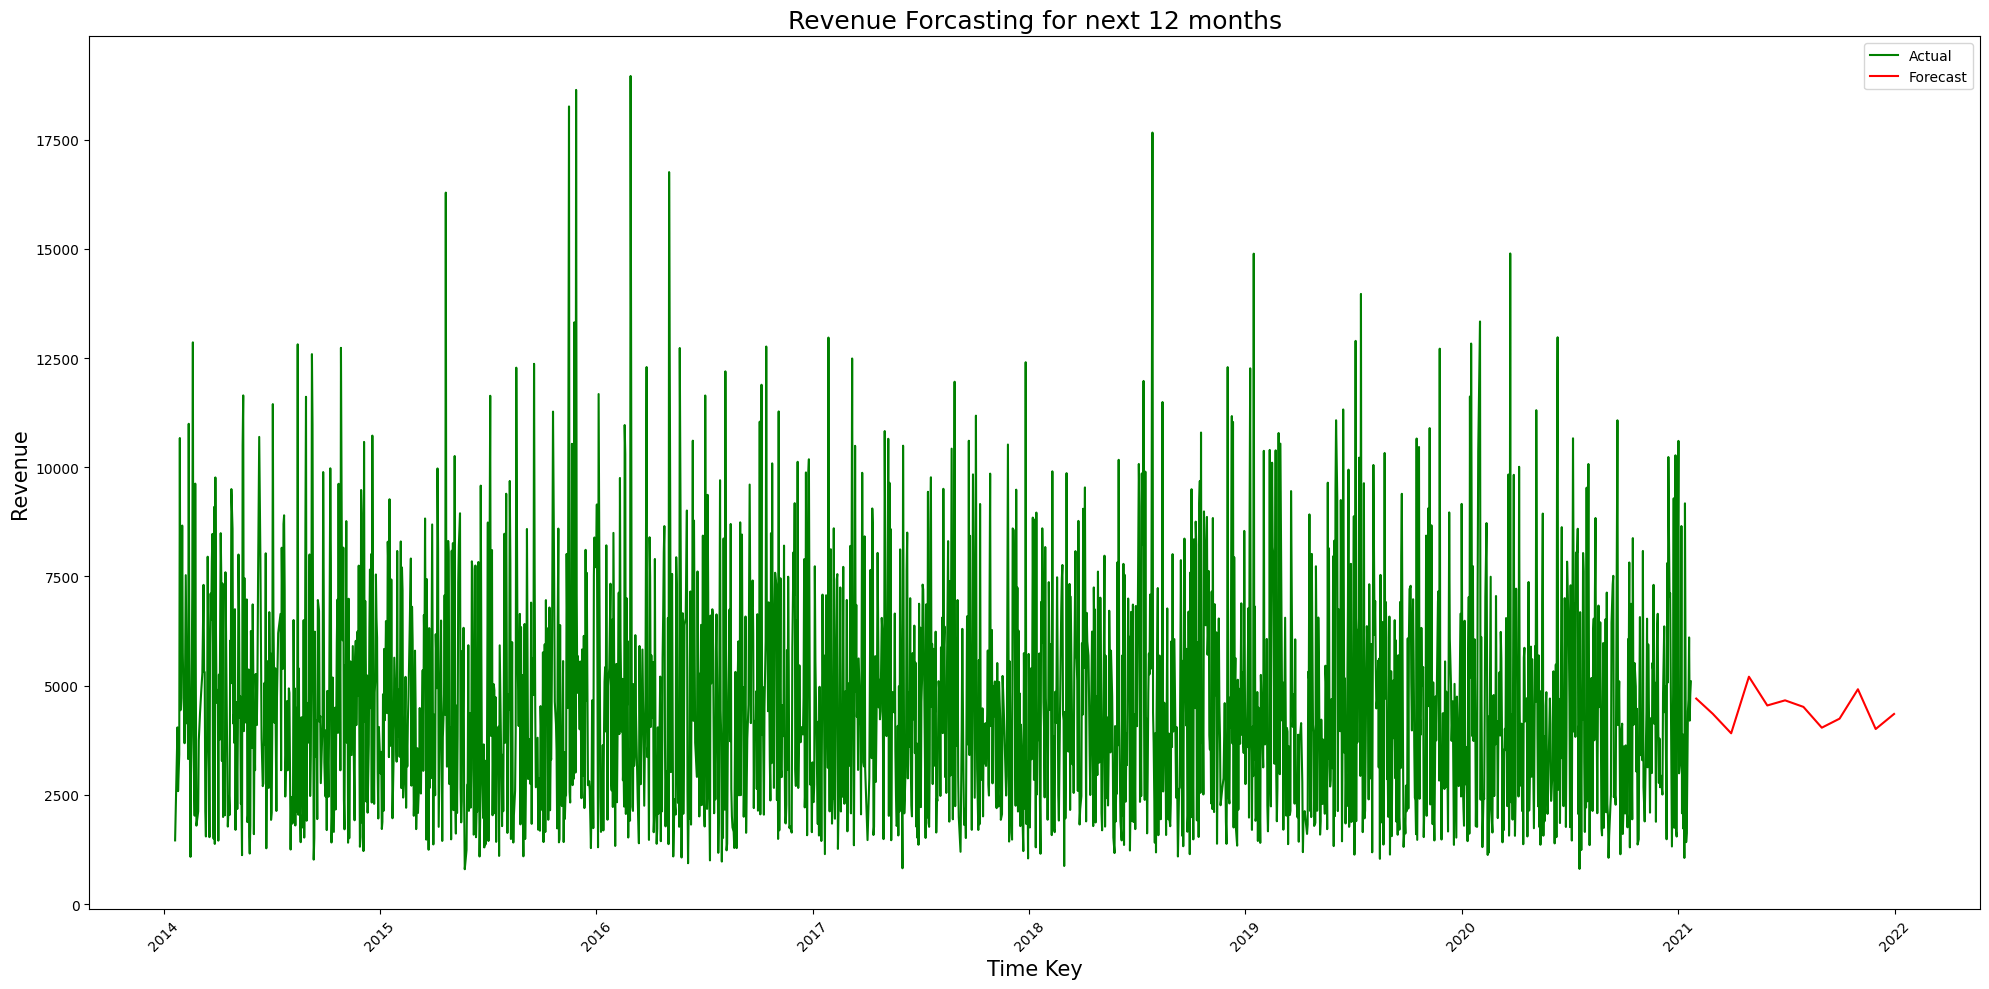

In [24]:
time_series_data = df.groupby('date')['total_price'].sum().reset_index()
time_series_data['date'] = pd.to_datetime(time_series_data['date'])
model = ExponentialSmoothing(time_series_data['total_price'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

forecast = fit.forecast(steps=12)
forecast_index = pd.date_range(start=time_series_data['date'].iloc[-1], periods=12, freq='M')

plt.figure(figsize=(20, 10))
plt.plot(time_series_data['date'], time_series_data['total_price'], label='Actual', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Revenue Forcasting for next 12 months', fontsize=18)
plt.xlabel('Time Key', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-------------------------------------------------
